Combining data science and machine learning allows for some powerful applications. This code retrieves financial data from Google Finance with the pandas module and then uses machine learning to predict the opening stock prices for one day in the future. 

**Disclaimer: The author of this code is not liable for how you use it. This is for educational purposes only. 


Populating the interactive namespace from numpy and matplotlib


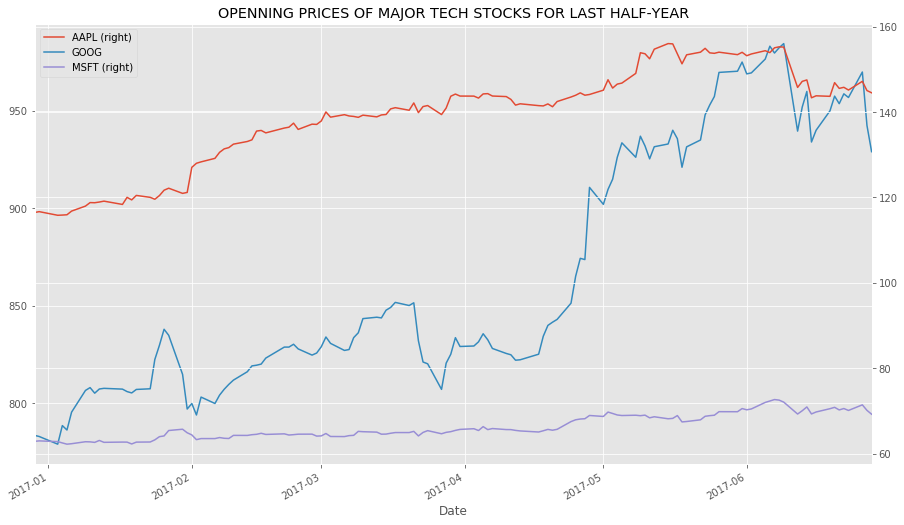

In [1]:
import csv #allow us to read csv of stock data that we will download
import numpy as np #let us perform calculations on our data
from sklearn.svm import SVR #let us build a predictive model 
import matplotlib.pyplot as plt #plot the data
#because matplotlib is a graphical library, it will depend on a graphical backend. If it isn't working try indicating one. 
import pandas as pd
import pandas_datareader.data as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
from matplotlib import style
import dateutil.relativedelta #allows you to specify a date from a set time ago 


#*********************************Retrieve and Plot Existing Stock Data ******************************************************

%matplotlib inline 
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
# #Delete the above three lines if you are running this code in anything other than Jupyter Notebook!

style.use('ggplot') #To make the plot more attractive 

end = datetime.date.today()
start = end + dateutil.relativedelta.relativedelta(months=-6) #we will be using 6 months of data. Dateutil is used here specify the date from one month ago.  

dates = [] #this and below array filled by get_data function 
pricesApple = [] #1D arrays to contain the openning price of each stock
pricesMicro = []
pricesGoogle = []

apple = web.DataReader("AAPL", "google", start, end) 
microsoft = web.DataReader("MSFT", "google", start, end)
google = web.DataReader("GOOG", "google", start, end)

stocks = pd.DataFrame({"AAPL": apple["Open"],
                      "MSFT": microsoft["Open"],
                      "GOOG": google["Open"]})

stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True) #Google stocks are worth much more than Apple and Microsoft stocks, so 
#I used a secondary scale for the later two.
title('OPENNING PRICES OF MAJOR TECH STOCKS FOR LAST HALF-YEAR')


The below code plots the data into a candlestick plot. Ignore if not interested.  

AAPL:


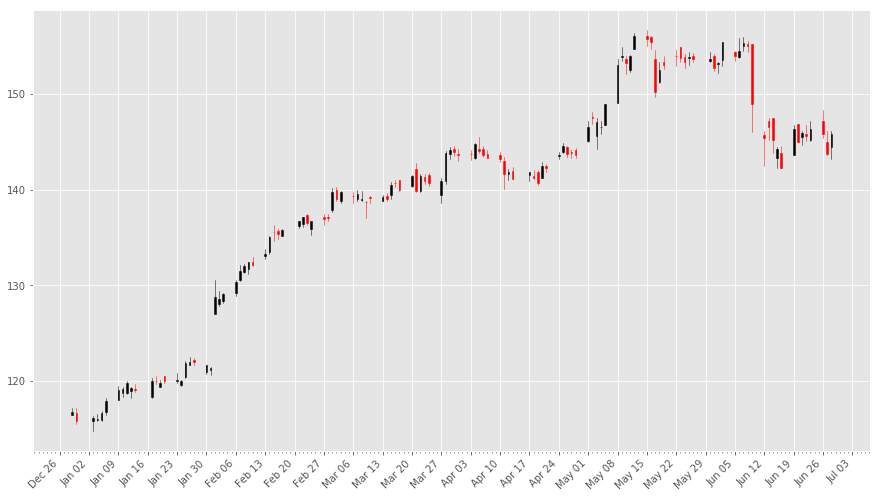

MSFT:


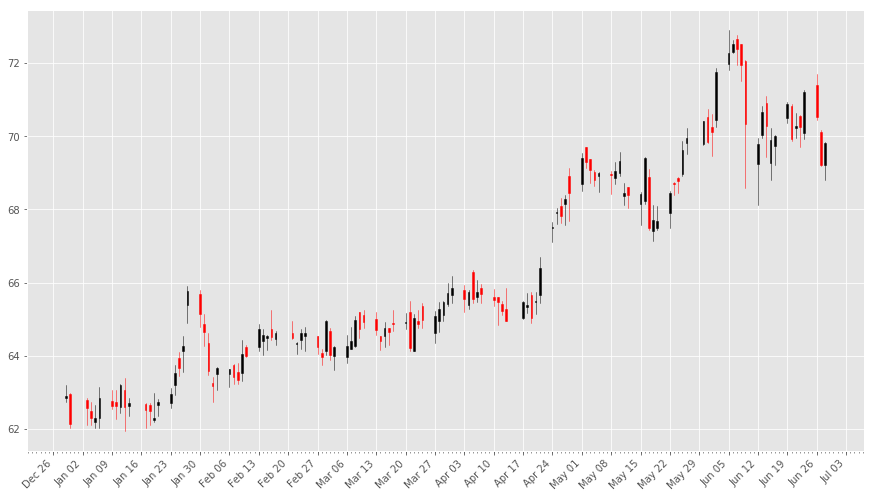

GOOG:


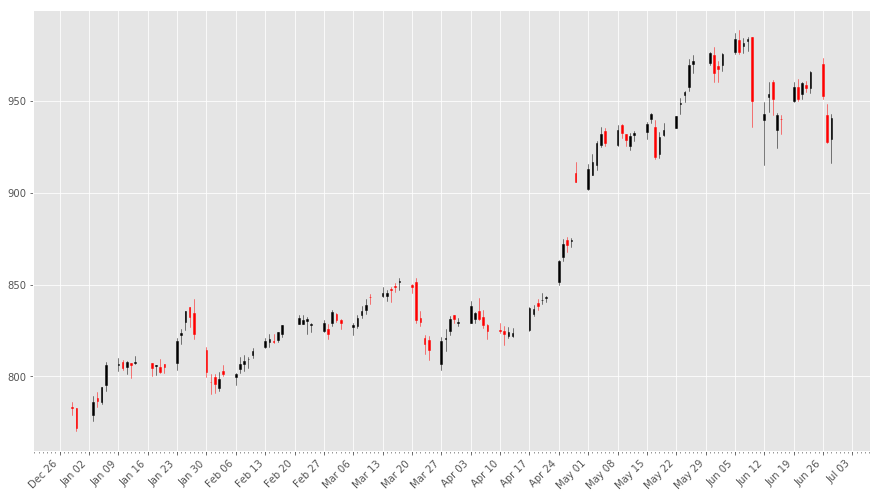

In [2]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None ):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
  
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candlestick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

print("AAPL:")
pandas_candlestick_ohlc(apple)

print("MSFT:")
pandas_candlestick_ohlc(microsoft)

print("GOOG:")
pandas_candlestick_ohlc(google)

Machine Learning Portion 
**To successfully run this portion you MUST run all cells 

In [3]:
#********************MACHINE LEARNING PREDICTION SECTION BELOW ************************************************************
apple.to_csv('apple.csv') #generates a spreadsheet file containing the data. 
microsoft.to_csv('microsoft.csv') 
google.to_csv('google.csv') 

def get_data(filename): #populate the dates and the prices arrays using the csv files. 
    with open(filename, 'r') as csvfile: #extract content of the CSV file to read it. (The 'r' parameter)
        csvFileReader = csv.reader(csvfile) #CSV module will create reader for us with csvfile as the parameter 
        next(csvFileReader) #skip first row (it's just column headings)
        for row in csvFileReader: #iterate over every row in the csv file 
            if (filename == 'apple.csv'):
                pricesApple.append(float(row[1])) #convert to a float for precision in our later calculations
            elif (filename == 'microsoft.csv'):
                pricesMicro.append(float(row[1]))
            elif (filename == 'google.csv'):
                pricesGoogle.append(float(row[1]))
   
    with open(filename, 'r') as csvfile: #extract content of the CSV file to read it. (The 'r' parameter)
        csvFileReader = csv.reader(csvfile) #CSV module will create reader for us with csvfile as the parameter 
        next(csvFileReader) #iterate over every row in the csv file 
        if (len(dates) == 0):
            for row in csvFileReader:
                dates.append(int(row[0].split('-')[2])) #append adds item to end of our list. We only want day of month so get row[2].
                # This is because date format is year-month-date. 
                # Use split function to remove the dashes in the date. Convert the date into an integer. 
    return

def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) #use numpy to format our list into n x 1 matrix. Three parameters are
    #the list we want to reshape, the new shape (a one-dimensional array the size of our dates list), and the order of elements.
    
    #Create a support vector machine model. 
    #In this case, we are not classifying but trying to predict next value in a series, so we use regression. Support Vector Regression
    # is a type of SVM that uses uses the space between datapoints as a margin of error and predicts most like next point. 
    
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)  #three parameters: kernel (type of svm),
    #penalty paramter C of the error term (1e3 is scientific notation for 1000). Rbf is a complex method of regression
    # The other options are linear and polynomial, but Rbf generally matches the data better. 

    svr_rbf.fit(dates, prices) #train the model
    
    return svr_rbf.predict(x)[0] #, svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('apple.csv')
get_data('microsoft.csv')
get_data('google.csv')

predicted_priceApple = predict_prices(dates, pricesApple, 29)
predicted_priceMicro = predict_prices(dates, pricesMicro, 29)
predicted_priceGoogle = predict_prices(dates, pricesGoogle, 29)

changeApple = predicted_priceApple - pricesApple[-1]
changeMicro = predicted_priceMicro - pricesMicro[-1]
changeGoogle = predicted_priceGoogle - pricesGoogle[-1]

print('Tomorrow the forecasted AAPL openning price is: $' + str(predicted_priceApple) + ' (' + str(changeApple) + ')')
print('Tomorrow the forecasted MSFT openning price is: $' + str(predicted_priceMicro) + ' (' + str(changeMicro) + ')')
print('Tomorrow the forecasted GOOG openning price is: $' + str(predicted_priceGoogle) + ' (' + str(changeGoogle) + ')')




Tomorrow the forecasted AAPL openning price is: $142.850513079 (-1.63948692124)
Tomorrow the forecasted MSFT openning price is: $65.0201049408 (-4.18989505925)
Tomorrow the forecasted GOOG openning price is: $812.848726242 (-116.151273758)
